In [22]:
#@markdown We implemented some functions to visualize the face landmark detection results. <br/> Run the following cell to activate the functions.

from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np
import matplotlib.pyplot as plt
import cv2


def draw_landmarks_on_image(rgb_image, detection_result):
    face_landmarks_list = detection_result.face_landmarks
    annotated_image = np.copy(rgb_image)
    # print(face_landmarks_list)

  # Loop through the detected faces to visualize.
    for idx in range(len(face_landmarks_list)):
        face_landmarks = face_landmarks_list[idx]
    
    face_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    face_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in face_landmarks
    ])

    print(face_landmarks_proto)

    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_TESSELATION,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp.solutions.drawing_styles
        .get_default_face_mesh_tesselation_style())
    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_CONTOURS,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp.solutions.drawing_styles
        .get_default_face_mesh_contours_style())
    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_IRISES,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp.solutions.drawing_styles
          .get_default_face_mesh_iris_connections_style())

    return annotated_image

def plot_face_blendshapes_bar_graph(face_blendshapes):
  # Extract the face blendshapes category names and scores.
  face_blendshapes_names = [face_blendshapes_category.category_name for face_blendshapes_category in face_blendshapes]
  face_blendshapes_scores = [face_blendshapes_category.score for face_blendshapes_category in face_blendshapes]
  # The blendshapes are ordered in decreasing score value.
  face_blendshapes_ranks = range(len(face_blendshapes_names))

  fig, ax = plt.subplots(figsize=(12, 12))
  bar = ax.barh(face_blendshapes_ranks, face_blendshapes_scores, label=[str(x) for x in face_blendshapes_ranks])
  ax.set_yticks(face_blendshapes_ranks, face_blendshapes_names)
  ax.invert_yaxis()

  # Label each bar with values
  for score, patch in zip(face_blendshapes_scores, bar.patches):
    plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{score:.4f}", va="top")

  ax.set_xlabel('Score')
  ax.set_title("Face Blendshapes")
  plt.tight_layout()
  plt.show()




In [23]:


# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# STEP 2: Create an FaceLandmarker object.
base_options = python.BaseOptions(model_asset_path='/home/lenovo/Documents/DASS/face_landmarker.task')
options = vision.FaceLandmarkerOptions(base_options=base_options,
                                       output_face_blendshapes=True,
                                       output_facial_transformation_matrixes=True,
                                       num_faces=20,min_face_detection_confidence=0.3)
detector = vision.FaceLandmarker.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file("/home/lenovo/Documents/DASS/DASS_project/left_jaw.jpeg")

# STEP 4: Detect face landmarks from the input image.
detection_result = detector.detect(image)

# STEP 5: Process the detection result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
output_image_path = "annotated_image.png"
cv2.imwrite(output_image_path, cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))




landmark {
  x: 0.4336091876029968
  y: 0.5761989951133728
  z: -0.0276811420917511
}
landmark {
  x: 0.4252755045890808
  y: 0.48815083503723145
  z: -0.046274520456790924
}
landmark {
  x: 0.44277286529541016
  y: 0.5231764316558838
  z: -0.027879031375050545
}
landmark {
  x: 0.4426824450492859
  y: 0.42052415013313293
  z: -0.023174254223704338
}
landmark {
  x: 0.4269558787345886
  y: 0.4632885456085205
  z: -0.0501423142850399
}
landmark {
  x: 0.4367036521434784
  y: 0.4378357529640198
  z: -0.04536617919802666
}
landmark {
  x: 0.47216007113456726
  y: 0.375044584274292
  z: -0.017377391457557678
}
landmark {
  x: 0.44191911816596985
  y: 0.38925623893737793
  z: 0.08687856048345566
}
landmark {
  x: 0.4846436381340027
  y: 0.3000646233558655
  z: -0.007097673136740923
}
landmark {
  x: 0.48654818534851074
  y: 0.2642174959182739
  z: -0.006341250147670507
}
landmark {
  x: 0.5082624554634094
  y: 0.17519491910934448
  z: 0.005915890447795391
}
landmark {
  x: 0.432811737060546

I0000 00:00:1709898197.342450   32512 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1709898197.344882   40759 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 21.2.6), renderer: Mesa Intel(R) UHD Graphics (ICL GT1)
W0000 00:00:1709898197.345592   32512 face_landmarker_graph.cc:174] Sets FaceBlendshapesGraph acceleration to xnnpack by default.


True

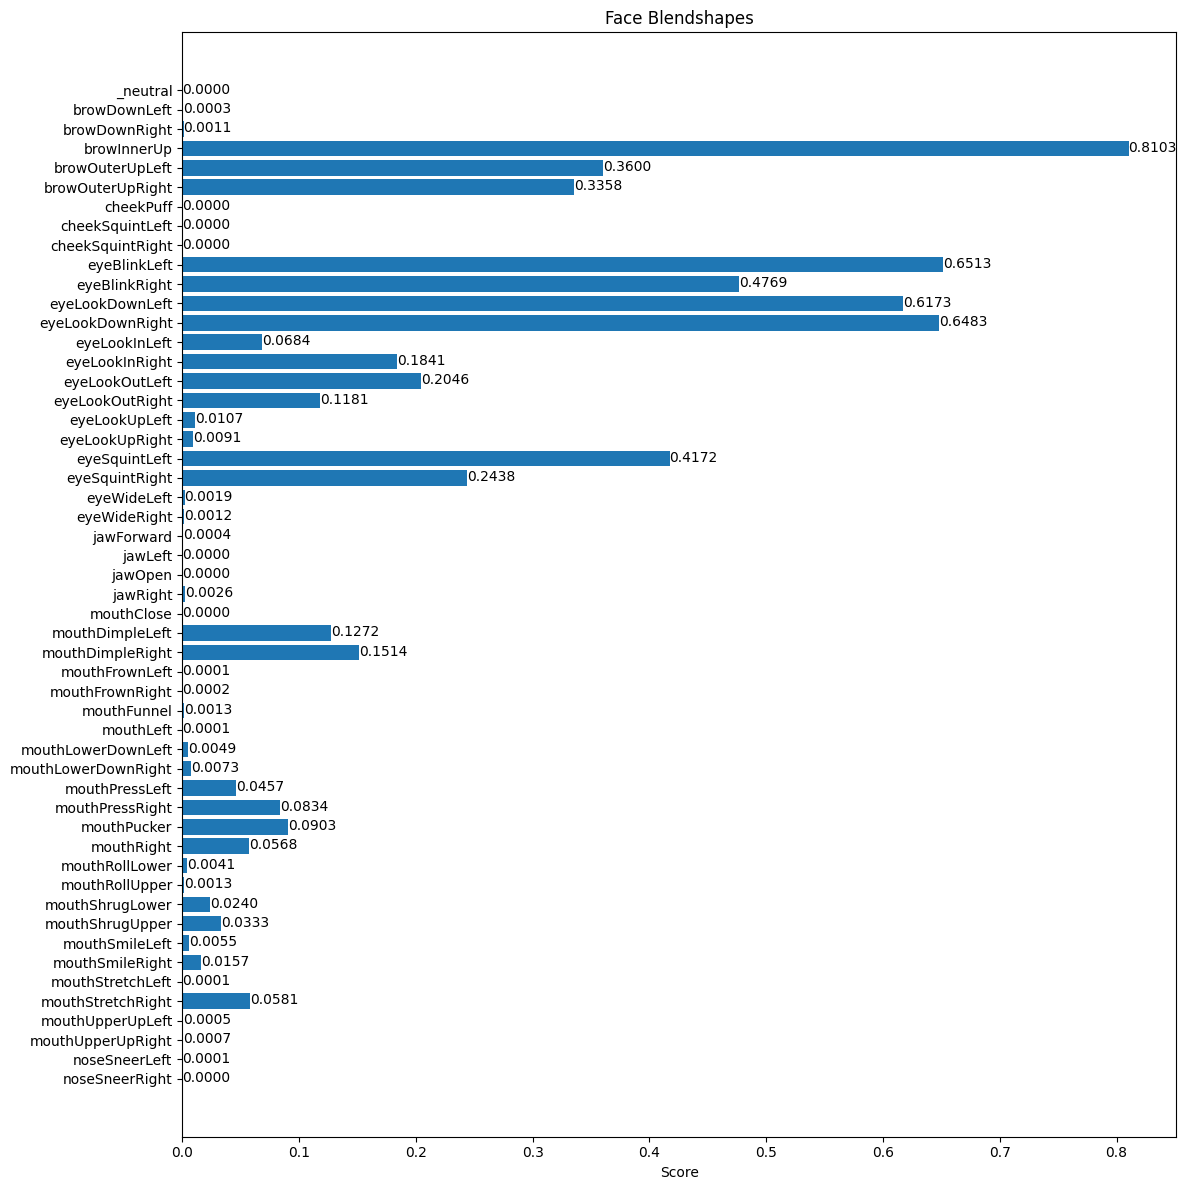

0.8102730512619019


In [24]:
plot_face_blendshapes_bar_graph(detection_result.face_blendshapes[0])
print(detection_result.face_blendshapes[0][3].score)

In [109]:
for i in range(20):

    test_image=mp.Image.create_from_file("/home/lenovo/Documents/DASS/new_annotated_image.png")
    
    print(detection_result.face_landmarks[0][i])
    
    x=detection_result.face_landmarks[0][i].x
    y=detection_result.face_landmarks[0][i].y
    z=detection_result.face_landmarks[0][i].z
    
    new_annotated_image=draw_landmarks_on_image_modify(test_image.numpy_view(),x,y,z)
    
    output_image_path_new = "new_annotated_image.png"
    cv2.imwrite(output_image_path_new, cv2.cvtColor(new_annotated_image, cv2.COLOR_RGB2BGR))

NormalizedLandmark(x=0.49535301327705383, y=0.5575825572013855, z=-0.023807059973478317, visibility=0.0, presence=0.0)
NormalizedLandmark(x=0.4949382543563843, y=0.5025821924209595, z=-0.04771615192294121, visibility=0.0, presence=0.0)
NormalizedLandmark(x=0.4950454831123352, y=0.5160140991210938, z=-0.025074534118175507, visibility=0.0, presence=0.0)
NormalizedLandmark(x=0.48855653405189514, y=0.45512866973876953, z=-0.03568325564265251, visibility=0.0, presence=0.0)
NormalizedLandmark(x=0.49520325660705566, y=0.4885583221912384, z=-0.050607264041900635, visibility=0.0, presence=0.0)
NormalizedLandmark(x=0.49563366174697876, y=0.4697721302509308, z=-0.04712039604783058, visibility=0.0, presence=0.0)
NormalizedLandmark(x=0.4970678985118866, y=0.42388102412223816, z=-0.023938331753015518, visibility=0.0, presence=0.0)
NormalizedLandmark(x=0.4386928081512451, y=0.4101787805557251, z=0.01315697468817234, visibility=0.0, presence=0.0)
NormalizedLandmark(x=0.4975510835647583, y=0.3992519974

In [23]:
print(len(detection_result.facial_transformation_matrixes))
print("\n")
print(detection_result.facial_transformation_matrixes[0])

6


[[ 9.91340220e-01  1.27295703e-01 -3.22443061e-02  3.00963116e+01]
 [-1.28549844e-01  9.90880489e-01 -4.03730310e-02  2.33551407e+01]
 [ 2.68109050e-02  4.41684127e-02  9.98663783e-01 -6.00113335e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


Category(index=0, score=1.61302818924014e-06, display_name='', category_name='_neutral')
